In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [20]:
print(tf.__version__)

2.8.0


In [21]:
tf.test.is_built_with_cuda()

True

In [22]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [23]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [31]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

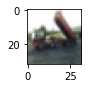

In [33]:
plot_sample(2)

In [34]:
x_train_scaled = x_train /255
x_test_scaled = x_test/255

In [35]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10,dtype = 'float32'

)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes=10,dtype='float32'


)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [39]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile (optimizer = 'SGD',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])



In [42]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
model.fit(x_test_scaled,y_test_categorical,epochs=50)

Epoch 1/50
313/313 [==============================] - 28s 76ms/step - loss: 2.0076 - accuracy: 0.2728
Epoch 2/50
313/313 [==============================] - 17s 54ms/step - loss: 1.8131 - accuracy: 0.3600
Epoch 3/50
313/313 [==============================] - 17s 53ms/step - loss: 1.7273 - accuracy: 0.3914
Epoch 4/50
313/313 [==============================] - 17s 53ms/step - loss: 1.6715 - accuracy: 0.4164
Epoch 5/50
313/313 [==============================] - 17s 54ms/step - loss: 1.6177 - accuracy: 0.4329
Epoch 6/50
313/313 [==============================] - 17s 53ms/step - loss: 1.5779 - accuracy: 0.4510
Epoch 7/50
313/313 [==============================] - 17s 54ms/step - loss: 1.5404 - accuracy: 0.4670
Epoch 8/50
313/313 [==============================] - 17s 53ms/step - loss: 1.5069 - accuracy: 0.4740
Epoch 9/50
313/313 [==============================] - 17s 55ms/step - loss: 1.4796 - accuracy: 0.4815
Epoch 10/50
313/313 [==============================] - 17s 55ms/step - loss: 1.447

In [44]:
model.predict(x_test_scaled)

array([[0.27179438, 0.46685526, 0.84908247, ..., 0.0026944 , 0.8759223 ,
        0.02051127],
       [0.7368921 , 0.92166203, 0.15411937, ..., 0.01950774, 0.9993891 ,
        0.93234575],
       [0.8278438 , 0.78865516, 0.21775538, ..., 0.09547052, 0.99739534,
        0.57475275],
       ...,
       [0.00662354, 0.04657993, 0.96603763, ..., 0.3472439 , 0.17965591,
        0.2700767 ],
       [0.58535606, 0.97463405, 0.7886609 , ..., 0.06207314, 0.34100822,
        0.04428601],
       [0.29347163, 0.03937253, 0.86871195, ..., 0.97458357, 0.23760054,
        0.03134379]], dtype=float32)

In [ ]:
 with tf.device('/GPU : 0')
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled , y_train_categorical,epochs=1)